In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import keras

In [3]:
column = ['pregnant', 'plasma', 'pressure','thickness', 'insulin','BMI', 'pedigree', 'age', 'class']
df = pd.read_csv('../data/pima-indians-diabetes.csv', names = column ) # header = None
df

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df[['pregnant','class']].groupby('pregnant').mean().sort_values(by='pregnant')

,class
pregnant,
0,0.342342
1,0.214815
2,0.184466
3,0.360000
4,0.338235
5,0.368421
6,0.320000
7,0.555556
8,0.578947


In [10]:
import matplotlib.pyplot as plt

In [19]:
pregnant_df = df[['pregnant','class']]
pregnant_df_group = pregnant_df.groupby(['pregnant'], as_index=False) # index로 사용하지 않고 column으로 올라옴
pregnant_df_group.mean()
pregnant_df_group.mean().sort_values(by='pregnant')

,pregnant,class
0,0,0.342342
1,1,0.214815
2,2,0.184466
3,3,0.360000
4,4,0.338235
5,5,0.368421
6,6,0.320000
7,7,0.555556
8,8,0.578947
9,9,0.642857


In [20]:
pregnant_df_group.count()

,pregnant,class
0,0,111
1,1,135
2,2,103
3,3,75
4,4,68
5,5,57
6,6,50
7,7,45
8,8,38
9,9,28


In [21]:
pregnant_df_group.sum()

,pregnant,class
0,0,38
1,1,29
2,2,19
3,3,27
4,4,23
5,5,21
6,6,16
7,7,25
8,8,22
9,9,18


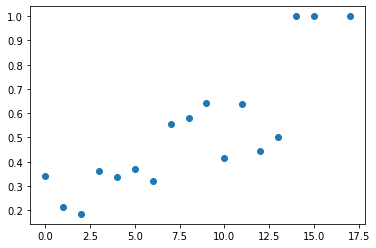

In [12]:
plt.scatter(df1.index, df1['class'])

In [17]:
df2 = df[['pregnant','class']].groupby('pregnant').sum().sort_values(by='pregnant')
df2

,class
pregnant,
0,38
1,29
2,19
3,27
4,23
5,21
6,16
7,25
8,22


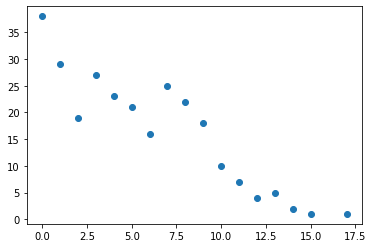

In [18]:
plt.scatter(df2.index, df2['class'])

In [22]:
'''
다음의 결과를 출력하는 데이터프레임을 생성하세요
pregnant, count, sum, mean
---------------------------
      0     111   38    0.342342
'''

'\n다음의 결과를 출력하는 데이터프레임을 생성하세요\npregnant, count, sum, mean\n---------------------------\n      0     111   38    0.342342\n'

In [35]:
df1 = pd.concat([pregnant_df_group.count(), pregnant_df_group.sum()['class']], axis=1)
df1 = pd.concat([df1, pregnant_df_group.mean()['class']], axis=1)
df1.columns = ['pregnant', 'count', 'sum', 'mean']
df1

,pregnant,count,sum,mean
0,0,111,38,0.342342
1,1,135,29,0.214815
2,2,103,19,0.184466
3,3,75,27,0.360000
4,4,68,23,0.338235
5,5,57,21,0.368421
6,6,50,16,0.320000
7,7,45,25,0.555556
8,8,38,22,0.578947
9,9,28,18,0.642857


In [38]:
df = pd.DataFrame()
df['pregnant'] = pregnant_df_group.count()['pregnant']
df['count'] = pregnant_df_group.count()['class']
df['sum'] = pregnant_df_group.sum()['class']
df['mean'] = pregnant_df_group.mean()['class']
df

,pregnant,count,sum,mean
0,0,111,38,0.342342
1,1,135,29,0.214815
2,2,103,19,0.184466
3,3,75,27,0.360000
4,4,68,23,0.338235
5,5,57,21,0.368421
6,6,50,16,0.320000
7,7,45,25,0.555556
8,8,38,22,0.578947
9,9,28,18,0.642857


In [40]:
df.sort_values(by='count', ascending=False)

,pregnant,count,sum,mean
1,1,135,29,0.214815
0,0,111,38,0.342342
2,2,103,19,0.184466
3,3,75,27,0.360000
4,4,68,23,0.338235
5,5,57,21,0.368421
6,6,50,16,0.320000
7,7,45,25,0.555556
8,8,38,22,0.578947
9,9,28,18,0.642857


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
plt.figure(figsize=(12,12))

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

In [44]:
column = ['pregnant', 'plasma', 'pressure','thickness', 'insulin','BMI', 'pedigree', 'age', 'class']
df = pd.read_csv('../data/pima-indians-diabetes.csv', names = column ) # header = None
df

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [45]:
df.corr()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


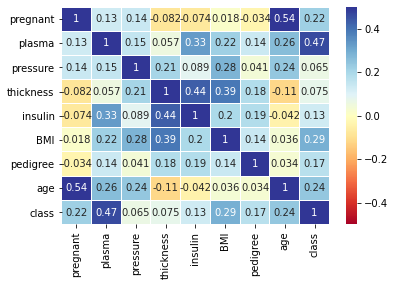

In [56]:
sns.heatmap(df.corr(), linewidths=0.1, linecolor='white', vmax=0.5, vmin=-0.5,
            cmap=plt.cm.RdYlBu, annot=True) # cmap은 matplotlib에서 이미 정해져 있음. annot는 숫자를 보여줌
plt.show()

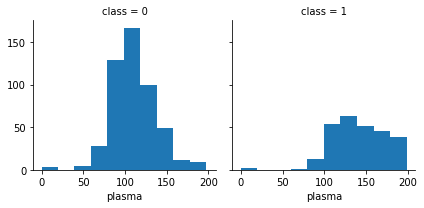

In [66]:
grid  = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma', bins=10)
plt.show()

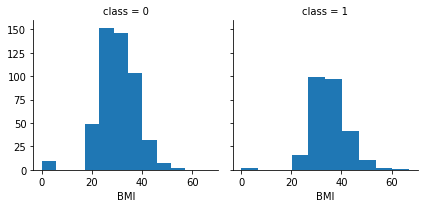

In [65]:
grid  = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'BMI', bins=10)
plt.show()

In [73]:
np.random.seed(3)
tf.random.set_seed(3)

In [72]:
dataset = df.values
X = dataset[:, :8]
Y = dataset[:,8]

print(X.shape, X.dtype)
print(Y.shape, Y.dtype)

(768, 8) float64
(768,) float64


In [91]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [92]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=(['accuracy']))

In [93]:
model.fit(X,Y, epochs=400, batch_size=20)

Epoch 1/400
39/39 [==============================] - 1s 3ms/step - loss: 3.2490 - accuracy: 0.6198
Epoch 2/400
39/39 [==============================] - 0s 3ms/step - loss: 1.5274 - accuracy: 0.6549
Epoch 3/400
39/39 [==============================] - 0s 3ms/step - loss: 1.1721 - accuracy: 0.6641
Epoch 4/400
39/39 [==============================] - 0s 2ms/step - loss: 0.9448 - accuracy: 0.6536
Epoch 5/400
39/39 [==============================] - 0s 2ms/step - loss: 0.8584 - accuracy: 0.6615
Epoch 6/400
39/39 [==============================] - 0s 3ms/step - loss: 0.7799 - accuracy: 0.6419
Epoch 7/400
39/39 [==============================] - 0s 3ms/step - loss: 0.8104 - accuracy: 0.6862
Epoch 8/400
39/39 [==============================] - 0s 4ms/step - loss: 0.8067 - accuracy: 0.6758
Epoch 9/400
39/39 [==============================] - 0s 9ms/step - loss: 0.8184 - accuracy: 0.6732
Epoch 10/400
39/39 [==============================] - 0s 7ms/step - loss: 0.8497 - accuracy: 0.6719
Epoch 11/

39/39 [==============================] - 0s 3ms/step - loss: 0.6067 - accuracy: 0.7240
Epoch 81/400
39/39 [==============================] - 0s 3ms/step - loss: 0.5122 - accuracy: 0.7617
Epoch 82/400
39/39 [==============================] - 0s 5ms/step - loss: 0.5197 - accuracy: 0.7513
Epoch 83/400
39/39 [==============================] - 0s 3ms/step - loss: 0.5142 - accuracy: 0.7526
Epoch 84/400
39/39 [==============================] - 0s 3ms/step - loss: 0.5204 - accuracy: 0.7500
Epoch 85/400
39/39 [==============================] - 0s 3ms/step - loss: 0.5435 - accuracy: 0.7669
Epoch 86/400
39/39 [==============================] - 0s 4ms/step - loss: 0.5042 - accuracy: 0.7513
Epoch 87/400
39/39 [==============================] - 0s 3ms/step - loss: 0.4914 - accuracy: 0.7656
Epoch 88/400
39/39 [==============================] - 0s 3ms/step - loss: 0.5076 - accuracy: 0.7643
Epoch 89/400
39/39 [==============================] - 0s 3ms/step - loss: 0.5689 - accuracy: 0.7188
Epoch 90/400


39/39 [==============================] - 0s 2ms/step - loss: 0.4938 - accuracy: 0.7708
Epoch 161/400
39/39 [==============================] - 0s 3ms/step - loss: 0.4824 - accuracy: 0.7891
Epoch 162/400
39/39 [==============================] - 0s 2ms/step - loss: 0.4846 - accuracy: 0.7721
Epoch 163/400
39/39 [==============================] - 0s 2ms/step - loss: 0.4776 - accuracy: 0.7839
Epoch 164/400
39/39 [==============================] - 0s 10ms/step - loss: 0.5148 - accuracy: 0.7656 0s - loss: 0.5576 - accura
Epoch 165/400
39/39 [==============================] - 0s 4ms/step - loss: 0.4765 - accuracy: 0.7656
Epoch 166/400
39/39 [==============================] - 0s 3ms/step - loss: 0.5253 - accuracy: 0.7591
Epoch 167/400
39/39 [==============================] - 0s 3ms/step - loss: 0.4770 - accuracy: 0.7669
Epoch 168/400
39/39 [==============================] - 0s 3ms/step - loss: 0.4770 - accuracy: 0.7617
Epoch 169/400
39/39 [==============================] - 0s 3ms/step - loss: 0.

Epoch 241/400
39/39 [==============================] - 0s 4ms/step - loss: 0.4454 - accuracy: 0.7930
Epoch 242/400
39/39 [==============================] - 0s 4ms/step - loss: 0.4442 - accuracy: 0.7943
Epoch 243/400
39/39 [==============================] - 0s 3ms/step - loss: 0.4567 - accuracy: 0.7904
Epoch 244/400
39/39 [==============================] - 0s 3ms/step - loss: 0.5096 - accuracy: 0.7721
Epoch 245/400
39/39 [==============================] - 0s 2ms/step - loss: 0.4996 - accuracy: 0.7786
Epoch 246/400
39/39 [==============================] - 0s 3ms/step - loss: 0.4487 - accuracy: 0.7956
Epoch 247/400
39/39 [==============================] - 0s 3ms/step - loss: 0.4873 - accuracy: 0.7773
Epoch 248/400
39/39 [==============================] - 0s 2ms/step - loss: 0.4493 - accuracy: 0.8008
Epoch 249/400
39/39 [==============================] - 0s 3ms/step - loss: 0.4588 - accuracy: 0.7956
Epoch 250/400
39/39 [==============================] - 0s 3ms/step - loss: 0.4811 - accurac

39/39 [==============================] - 0s 3ms/step - loss: 0.4451 - accuracy: 0.7878
Epoch 321/400
39/39 [==============================] - 0s 3ms/step - loss: 0.4338 - accuracy: 0.8047
Epoch 322/400
39/39 [==============================] - 0s 3ms/step - loss: 0.4400 - accuracy: 0.7943
Epoch 323/400
39/39 [==============================] - 0s 3ms/step - loss: 0.4353 - accuracy: 0.7943
Epoch 324/400
39/39 [==============================] - 0s 3ms/step - loss: 0.4180 - accuracy: 0.8060
Epoch 325/400
39/39 [==============================] - 0s 3ms/step - loss: 0.4133 - accuracy: 0.8086
Epoch 326/400
39/39 [==============================] - 0s 2ms/step - loss: 0.4443 - accuracy: 0.7904
Epoch 327/400
39/39 [==============================] - 0s 3ms/step - loss: 0.4171 - accuracy: 0.8138
Epoch 328/400
39/39 [==============================] - 0s 3ms/step - loss: 0.4456 - accuracy: 0.7878
Epoch 329/400
39/39 [==============================] - 0s 4ms/step - loss: 0.4217 - accuracy: 0.8086
Epoc

In [94]:
model.evaluate(X,Y) # 0 : loss, 1: accuracy

24/24 [==============================] - 1s 3ms/step - loss: 0.3996 - accuracy: 0.8138


[0.3996008336544037, 0.8138020634651184]

In [97]:
result = model.evaluate(X,Y, verbose=0) # verbose 다른 잡다한 숫자를 표현하지 말라. default=1
result

[0.3996008336544037, 0.8138020634651184]

In [99]:
print('%.4f'%(result[1]))

0.8138


In [101]:
print('loss: {:.4f}, accuracy: {:.4f}'.format(result[0], result[1]))

loss: 0.3996, accuracy: 0.8138
